In [1]:
import pandas as pd

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', header=None, na_values=['?'])

In [47]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [48]:
dg = df[[0,1,3,4,6,8,9,10]].rename(columns = {0:'surgery', 1:'adult', 3:'rectal_temperature', 4:'pulse', 6:'temperature_of_extremites', 7:'peripheral_pulse', 8:'mucous_membranes', 9:'capillary_refill_time', 10:'pain'})

In [49]:
dg

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
0,2.0,1,38.5,66.0,3.0,NaN,2.0,5.0
1,1.0,1,39.2,88.0,NaN,4.0,1.0,3.0
2,2.0,1,38.3,40.0,1.0,3.0,1.0,3.0
3,1.0,9,39.1,164.0,4.0,6.0,2.0,2.0
4,2.0,1,37.3,104.0,NaN,6.0,2.0,NaN
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,4.0,4.0,2.0,2.0
296,2.0,1,37.2,72.0,3.0,4.0,2.0,4.0
297,1.0,1,37.5,72.0,4.0,4.0,1.0,4.0
298,1.0,1,36.5,100.0,3.0,3.0,1.0,3.0


In [50]:
#задание 1
dg[['surgery', 'adult', 'temperature_of_extremites', 'mucous_membranes', 'capillary_refill_time', 'pain']].mode() 
#большенство лошадей имели операции, старше 6 месяцев, имеют холодные конечности, имеют нормальную слизистую, малое время пополнения капилляров, и легкую боль

,surgery,adult,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
0,1.0,1,3.0,1.0,1.0,3.0


In [51]:
dg[['rectal_temperature', 'pulse']].describe()
#ректальная температура в норме, пульс в 1.5 раза выше нормы (скорее всего из-за выбрасов)

,rectal_temperature,pulse
count,240.000000,276.000000
mean,38.167917,71.913043
std,0.732289,28.630557
min,35.400000,30.000000
25%,37.800000,48.000000
50%,38.200000,64.000000
75%,38.500000,88.000000
max,40.800000,184.000000


In [52]:
#задание 2
#сначала ищем строки с ошибками в категорных столбцах и удаляем эти строки
dg[(dg.surgery != 1) & (dg.surgery != 2) & dg.surgery.notna()]
#ошибок нет

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain


In [53]:
dg1 = dg[(dg.adult != 1) & (dg.adult != 2) & dg.adult.notna()] 
dg1
#есть ошибки, также можно заметить, что у всех этих лошадей высокие значения пульса (норма 30-40)

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
3,1.0,9,39.1,164.0,4.0,6.0,2.0,2.0
9,2.0,9,38.3,90.0,1.0,1.0,1.0,5.0
13,2.0,9,38.0,92.0,1.0,2.0,1.0,1.0
16,1.0,9,NaN,128.0,3.0,4.0,2.0,4.0
23,1.0,9,38.3,130.0,NaN,NaN,1.0,2.0
39,1.0,9,39.2,146.0,NaN,NaN,NaN,NaN
41,2.0,9,39.0,150.0,NaN,NaN,NaN,NaN
55,1.0,9,38.6,160.0,3.0,5.0,1.0,3.0
74,1.0,9,NaN,NaN,NaN,NaN,NaN,NaN
75,1.0,9,39.7,100.0,3.0,5.0,2.0,2.0


In [54]:
dg[(dg.temperature_of_extremites != 1) & (dg.temperature_of_extremites != 2) & (dg.temperature_of_extremites != 3) & (dg.temperature_of_extremites != 4) & (dg.temperature_of_extremites != 5)  & dg.temperature_of_extremites.notna()]
#ошибок нет

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain


In [55]:
dg[(dg.mucous_membranes != 1) & (dg.mucous_membranes != 2) & (dg.mucous_membranes != 3) & (dg.mucous_membranes != 4) & (dg.mucous_membranes != 5) & (dg.mucous_membranes != 6) & dg.mucous_membranes.notna()]
#ошибок нет

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain


In [56]:
dg2 = dg[(dg.capillary_refill_time != 1) & (dg.capillary_refill_time != 2) & dg.capillary_refill_time.notna()]
dg2
#есть ошибки

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
78,1.0,1,NaN,NaN,3.0,3.0,3.0,5.0
85,2.0,1,38.0,54.0,2.0,3.0,3.0,3.0


In [57]:
dg[(dg.pain != 1) & (dg.pain != 2) & (dg.pain != 3) & (dg.pain != 4) & (dg.pain != 5)  & dg.pain.notna()]
#нет ошибок

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain


In [58]:
#выкидываем строчки с ошибками
dg = pd.concat([dg, dg1, dg2]).drop_duplicates(keep=False)

In [59]:
#показатели из задания 1 после чистки от ошибок (изменения незаметны)
dg[['surgery', 'adult', 'temperature_of_extremites', 'mucous_membranes', 'capillary_refill_time', 'pain']].mode() 

,surgery,adult,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
0,1.0,1,3.0,1.0,1.0,3.0


In [60]:
dg[['rectal_temperature', 'pulse']].describe()

,rectal_temperature,pulse
count,201.000000,230.000000
mean,38.086567,66.678261
std,0.722266,23.935520
min,35.400000,30.000000
25%,37.700000,48.000000
50%,38.100000,60.000000
75%,38.500000,84.000000
max,40.800000,140.000000


In [61]:
#теперь работаем с выбросами по непрерывным параметрам
tq1 = dg.rectal_temperature.quantile(0.25)
tq3 = dg.rectal_temperature.quantile(0.75)
dg[(dg.rectal_temperature < tq1 - 1.5 * (tq3 - tq1)) | (dg.rectal_temperature > tq3 + 1.5 * (tq3 - tq1))]
#т.к. распределение по температурам узкое (имеет малую дисперсию) и показания представленных температуп выглядят адекватно, 
#ничего из этого не отбрасываем

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
20,1.0,1,39.9,72.0,1.0,5.0,2.0,5.0
44,1.0,1,35.4,140.0,3.0,4.0,2.0,4.0
80,1.0,1,36.4,98.0,3.0,4.0,1.0,4.0
118,1.0,1,36.5,78.0,1.0,1.0,1.0,5.0
141,2.0,1,36.0,42.0,NaN,5.0,1.0,NaN
238,2.0,1,36.1,88.0,3.0,3.0,1.0,3.0
259,1.0,1,40.8,72.0,3.0,1.0,1.0,2.0
281,2.0,1,40.0,78.0,3.0,5.0,1.0,2.0
298,1.0,1,36.5,100.0,3.0,3.0,1.0,3.0


In [62]:
pq1 = dg.pulse.quantile(0.25)
pq3 = dg.pulse.quantile(0.75)
dg3 = dg[(dg.pulse < pq1 - 1.5 * (pq3 - pq1)) | (dg.pulse > pq3 + 1.5 * (pq3 - pq1))]
dg3
# это значение выглядит странным (низкая температура и высокий пульс) так что его откидываем

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
44,1.0,1,35.4,140.0,3.0,4.0,2.0,4.0


In [63]:
dg = pd.concat([dg, dg3]).drop_duplicates(keep=False)

array([[<AxesSubplot:title={'center':'pulse'}>]], dtype=object)

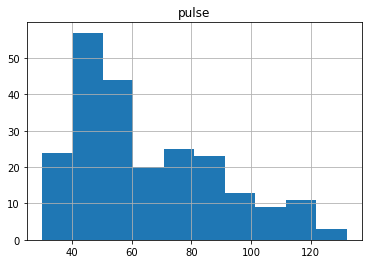

In [64]:
#также убедимся в адекватности данных построив гистограммы
dg.hist(column='pulse')

array([[<AxesSubplot:title={'center':'rectal_temperature'}>]],
      dtype=object)

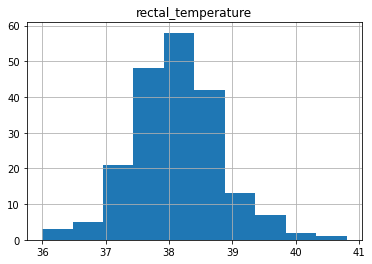

In [65]:
dg.hist(column='rectal_temperature')

In [66]:
#задание 3
#сначала выкидываем все строки с более чем двумя пропусками
dg = dg.dropna(thresh=7)

In [67]:
dg[dg.surgery.isna()]
#т.к. тут всего один пропуск, для его заполнения посмотрим значения при тех же известных параметрах

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
132,NaN,1,38.0,48.0,3.0,3.0,1.0,4.0


In [68]:
dg[(dg.adult == 1) & (dg.temperature_of_extremites == 3) & (dg.mucous_membranes == 3) & (dg.capillary_refill_time == 1) & (dg.pain == 4)].surgery.mean()
# большенство лошадей с такими параметрами имели операции (3 из 4) так что будем считать, что и у этой была
# это заполнение несовсем корректно, т.к. по этим параметрам никак не определить наличие операции

1.25

In [69]:
dg.surgery.fillna(1, inplace=True)

In [71]:
dg[dg.adult.isna()]
#пропусков нет

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain


In [72]:
dg[dg.temperature_of_extremites.isna()]
# это столбец будем определять по всем кроме 'surgery', 'pain', 'rectal_temperature', 'pulse'

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
1,1.0,1,39.2,88.0,NaN,4.0,1.0,3.0
81,1.0,1,37.3,40.0,NaN,1.0,1.0,2.0
95,1.0,1,37.3,48.0,NaN,2.0,1.0,3.0
121,1.0,1,38.3,80.0,NaN,6.0,2.0,4.0
128,1.0,1,37.4,84.0,NaN,3.0,1.0,2.0
148,1.0,1,38.3,132.0,NaN,6.0,2.0,2.0
181,2.0,1,37.8,48.0,NaN,1.0,1.0,3.0
190,1.0,1,37.1,40.0,NaN,4.0,1.0,3.0
210,1.0,1,37.9,68.0,NaN,2.0,1.0,2.0
260,2.0,1,38.0,40.0,NaN,1.0,1.0,4.0


In [88]:
dg4 = dg.groupby(['adult', 'mucous_membranes', 'capillary_refill_time'], as_index=False)[['temperature_of_extremites']].agg(lambda x: pd.Series.mode(x)[0])
dg4
#распределять будем согластно этой таблице

,adult,mucous_membranes,capillary_refill_time,temperature_of_extremites
0,1,1.0,1.0,1.0
1,1,1.0,2.0,1.0
2,1,2.0,1.0,1.0
3,1,2.0,2.0,1.0
4,1,3.0,1.0,1.0
5,1,3.0,2.0,1.0
6,1,4.0,1.0,3.0
7,1,4.0,2.0,3.0
8,1,5.0,1.0,3.0
9,1,5.0,2.0,1.0


In [98]:
dg5 = dg.merge(dg4, on=['adult', 'mucous_membranes', 'capillary_refill_time'], how='left')

In [99]:
dg5.temperature_of_extremites_x.fillna(dg5.temperature_of_extremites_y, inplace=True)
dg5.drop(['temperature_of_extremites_y'], axis=1, inplace=True)
dg = dg5.rename(columns={'temperature_of_extremites_x': 'temperature_of_extremites'})

In [100]:
dg[dg.mucous_membranes.isna()]
#будем заполнять аналогично предыдущему, но по столбцам 'adult', 'temperature_of_extremites', 'capillary_refill_time'

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
0,2.0,1,38.5,66.0,3.0,NaN,2.0,5.0
41,2.0,1,37.0,60.0,3.0,NaN,1.0,3.0
64,1.0,1,38.3,40.0,3.0,NaN,1.0,1.0
78,1.0,1,37.4,50.0,3.0,NaN,1.0,4.0
85,2.0,1,38.0,60.0,1.0,NaN,1.0,3.0
101,2.0,1,39.5,60.0,3.0,NaN,2.0,3.0
125,2.0,1,38.5,96.0,3.0,NaN,2.0,2.0
142,1.0,1,39.2,88.0,4.0,NaN,2.0,5.0
143,1.0,1,38.5,92.0,4.0,NaN,1.0,2.0
149,1.0,1,38.5,104.0,3.0,NaN,1.0,4.0


In [101]:
dg6 = dg.groupby(['adult', 'temperature_of_extremites', 'capillary_refill_time'], as_index=False)[['mucous_membranes']].agg(lambda x: pd.Series.mode(x)[0])
dg6

,adult,temperature_of_extremites,capillary_refill_time,mucous_membranes
0,1,1.0,1.0,1.0
1,1,1.0,2.0,3.0
2,1,2.0,1.0,1.0
3,1,2.0,2.0,1.0
4,1,3.0,1.0,1.0
5,1,3.0,2.0,4.0
6,1,4.0,1.0,1.0
7,1,4.0,2.0,4.0


In [104]:
dg7 = dg.merge(dg6, on=['adult', 'temperature_of_extremites', 'capillary_refill_time'], how='left')
dg7.mucous_membranes_x.fillna(dg7.mucous_membranes_y, inplace=True)
dg7.drop(['mucous_membranes_y'], axis=1, inplace=True)
dg = dg7.rename(columns={'mucous_membranes_x': 'mucous_membranes'})

In [105]:
dg[dg.capillary_refill_time.isna()]

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
13,1.0,1,38.6,42.0,2.0,4.0,NaN,2.0
66,1.0,1,38.4,44.0,3.0,4.0,NaN,5.0
108,2.0,1,39.0,86.0,3.0,5.0,NaN,3.0


In [107]:
dg8 = dg.groupby(['adult', 'temperature_of_extremites', 'mucous_membranes'], as_index=False)[['capillary_refill_time']].agg(lambda x: pd.Series.mode(x)[0])
dg9 = dg.merge(dg8, on=['adult', 'temperature_of_extremites', 'mucous_membranes'], how='left')
dg9.capillary_refill_time_x.fillna(dg9.capillary_refill_time_y, inplace=True)
dg9.drop(['capillary_refill_time_y'], axis=1, inplace=True)
dg = dg9.rename(columns={'capillary_refill_time_x': 'capillary_refill_time'})

In [109]:
dg[dg.pain.isna()]
#т.к. 'pain', 'rectal_temperature', 'pulse' особо ни с чем не коррелируют их заполним модальным значением и средним

,surgery,adult,rectal_temperature,pulse,temperature_of_extremites,mucous_membranes,capillary_refill_time,pain
14,1.0,1,38.1,60.0,3.0,3.0,1.0,NaN
15,1.0,1,37.8,48.0,3.0,1.0,1.0,NaN
99,1.0,1,37.8,60.0,1.0,3.0,2.0,NaN
107,2.0,1,37.5,44.0,1.0,3.0,1.0,NaN
117,1.0,1,38.5,120.0,4.0,6.0,2.0,NaN
133,1.0,1,37.8,88.0,3.0,5.0,2.0,NaN
137,1.0,1,37.6,45.0,3.0,3.0,1.0,NaN
166,1.0,1,38.7,96.0,3.0,4.0,1.0,NaN


In [111]:
dg.pain.fillna(dg.pain.agg(lambda x: pd.Series.mode(x)[0]), inplace=True)
dg.rectal_temperature.fillna(dg.rectal_temperature.mean(), inplace=True)
dg.pulse.fillna(dg.pulse.mean(), inplace=True)